### Load Data

In [71]:
import pandas as pd
import numpy as np

data_path = './Data/train.csv'
df = pd.read_csv(data_path, sep=',')
test_path = './Data/test.csv'
X_test = pd.read_csv(test_path, sep=',')
ids = X_test['Id']

df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Split training data

In [72]:
# Split target variable from data
X = df.drop(['SalePrice', 'Id'], axis='columns')
y = df['SalePrice']
X_test = X_test.drop(['Id'], axis='columns')
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Preprocess data

In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# Combine training and test set
combined = pd.concat([X, X_test], axis=0)

# Determine which columns are categorical
categorical_features = list(set(X.columns) - set(X._get_numeric_data().columns))

# Get dummy variables for categorical data
combined = pd.get_dummies(combined, columns=categorical_features)

# Split back into training and test set
X = combined[:len(X)]
X_test = combined[len(X):]

# Impute NaN data
imputer = SimpleImputer(strategy='constant')
X = imputer.fit_transform(X)
X_test = imputer.fit_transform(X_test)

## Perform exploratory data analysis

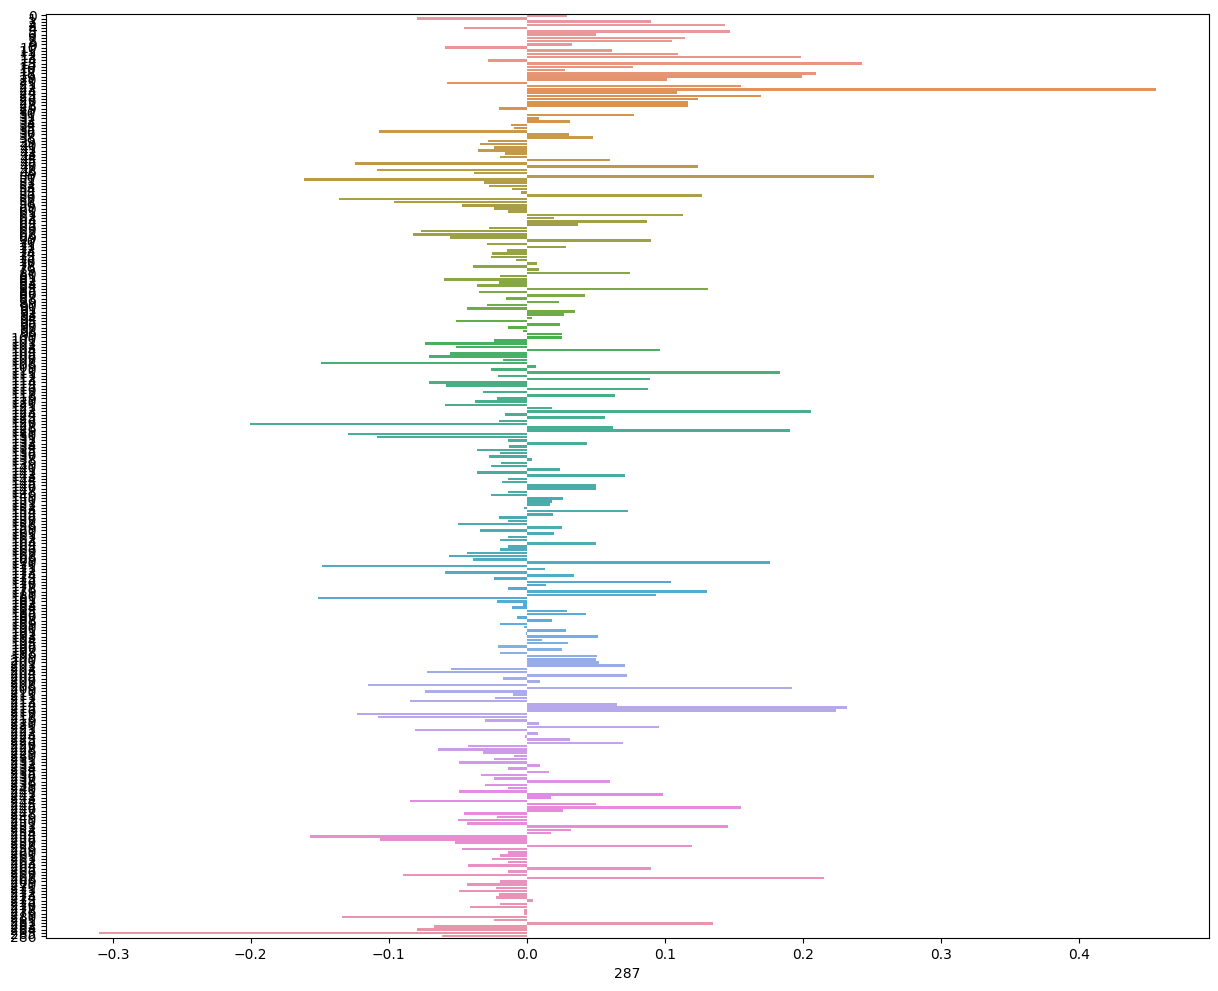

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_df = pd.DataFrame(X)
# Plot the correlation to target
corr_matrix = X_df.corr(numeric_only=True)

# Set figure size 
plt.figure(figsize=(15, 12))

sns.barplot(x=corr_matrix.iloc[:-1,-1], y=corr_matrix.index[:-1], orient='h')

# Print filter
plt.show()

In [52]:
from sklearn.feature_selection import VarianceThreshold
# Filter
filterModel = VarianceThreshold(threshold=.01)
filteredX = filterModel.fit_transform(X)

X = filterModel.transform(X)
X_test = filterModel.transform(X_test)

### Split the data into a stratified 80/20 train/test split

In [57]:
from sklearn.model_selection import train_test_split

# Get train_test_split for tuning and accuracy metrics
X_train, X_test_data, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
print(X.shape)
print(X_test.shape)

(1460, 201)
(1459, 201)


### Tune model variables

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time
# Tuning
# Set parameters for grid search
grid = { 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson '],
        'n_estimators': [i * 10 for i in range(1, 11)], 
        'max_features': [i for i in range(120, 140)], 
        'max_depth': [i for i in range(4, 6)] }

# Create GridSearchCV
GridSearch = GridSearchCV(RandomForestRegressor(), param_grid=grid, scoring='r2')

start = time.time()
GridSearch.fit(X_train, y_train)
print('fitting took', time.time()-start, 'seconds')

fitting took 4580.325912237167 seconds


/home/dmutka/miniconda3/envs/cs4347/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dmutka/miniconda3/envs/cs4347/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dmutka/miniconda3/envs/cs4347/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/home/dmutka/miniconda3/envs/cs4347/lib/python3.8/site-packages/sklearn/base.py", line 570, in _validate_pa

In [31]:
print("Best n_estimators:", GridSearch.best_params_['n_estimators'])
print("Best max_features:", GridSearch.best_params_['max_features'])
print("Best max_depth:", GridSearch.best_params_['max_depth'])
print("Best criterion:", GridSearch.best_params_['criterion'])

Best n_estimators: 70
Best max_features: 130
Best max_depth: 5
Best criterion: friedman_mse


## Create model with tuned variables

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Create RandomForestRegressor with tuned variables
model = RandomForestRegressor(n_estimators=70, max_features=130, max_depth=5, criterion='friedman_mse')

### Use train/test split to predict model accuracy

In [67]:
from sklearn import metrics

# Use training data to get accuracy metrics
model.fit(X_train, y_train)

y_pred = model.predict(X_test_data)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:     ', '{:.2f}'.format(MAE))
print('Mean Squared Error:      ', '{:.2f}'.format(MSE))
print('Root Mean Squared Error: ', '{:.2f}'.format(RMSE))
print('R2 Score:                ', '{:.4f}'.format(R2))

Mean Absolute Error:      22956.43
Mean Squared Error:       1869223598.24
Root Mean Squared Error:  43234.52
R2 Score:                 0.7600


## Predict test data target variable

In [75]:
# Fit with full training data set
model.fit(X, y)

# Get Predictions
y_pred = model.predict(X_test)

In [76]:
import csv

predictions = list(zip(ids, y_pred))
with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id', 'SalePrice'])
    for row in predictions:
        writer.writerow(row)